<a href="https://colab.research.google.com/github/Philianemeka/Learning-Projects/blob/main/Artificial_Intelligence_Project_Cognizant%2C_Emeka_Ogbonna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After giving recommendations, the customer want to focus on the following problem statement:

*They want to know if they can accurately predict the stock levels of products based on sales data and sensor data on an hourly basis in order to more intelligently procure products from their suppliers?*

The client has also agreed to share more data like a sensor data. They use sensors to measure the temperature of storage facilities where products are stored in the warehouse, and they also check stock levels within the refrigerators and freezers in store.

And before I'd continue, The data engineers would provide the data model diagram.

Now my task is to look at the data model diagram that has been provided by the Data Engineering team and to decide on what data I am going to use from the data available. In addition, I'd need to create a strategic plan as to how I’ll use this data to complete the work to answer the problem statement.

From the data model diagram provided, three (3) datasets were provided;
(i) Sales data
(11) Sensore Stock Level Data
(iii) Sensore Storage temperature

Step 1: Data modeling.

To be provided by the Data Engineering team

Step 2: Strategic planning

Come up with a plan as to how I’ll use this data to solve the problem statement that the client has positioned. This plan will be used to describe to the client how I am planning to complete the remaining work and to build trust with the client as a domain expert.

Step 3: Communication

I will Summarize the data that you want to make use of and the strategic plan of action in business friendly language in a PowerPoint slide. This will be sent to the Data Science team leader and the client.

# Plan Implementation

I have previously outlined the strategic plan for completing the modeling work based on the problem statement using the data model provided. They are;
1. Data preparation
2. Feature Engineering
3. Model Experimentation
4. Evaluation and Iteration
5. Development and Production
6. QA and DevOPs

It is now time for me to deliver on this strategic plan

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


---

## Section 2 - Data loading

I will first upload the 3 data sets to Google Drive then from Google Drive I will upload the 3 datasets to colab. !Be sure to upload the datasets into Google Drive, so that you can access them here if you are using colab too.

In [ ]:
# Uploading Sales Data to colab environment as sales

path = "/content/drive/MyDrive/"

sales = pd.read_csv(f"{path}sales.csv")
sales.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
# Uploading the sensor stock levels data to colab environment and rename it as stock

stock = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
# Uploading the sensor storage temperature data to colab environment and rename it as temp.

temp= pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


---

## Section 4 - Data cleaning

Now that I have the 3 datasets successfully loaded, I need to ensure that the data is clean.

Data cleaning can be a very intense task, so for this exercise, I will focus just on ensuring that there are no empty cells and the correct datatypes are present for each column, and if not, correcting them.

So I will use the `.info()` method to look at data types. This tool will give a look into the data to see the number of columns and rows, If there are null values and the data types

In [ ]:
# Viewing the info of the Sales data

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
# Viewing the info of the stock data

stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


Everything looks fine for the 3 datasets, no null values and all data types are correct exccept the `timestamp` column in each dataset that has a data type as object. Using the same helper function as before, let's convert the `timestamp` column data type to the correct type for each dataset.

In [ ]:
# Convert 'timestamp' column of sales data from object to datetime data type
sales['timestamp'] = pd.to_datetime(sales['timestamp'])

# Verify the conversion
print(sales.dtypes)  # Now shows 'timestamp' as datetime64[ns]

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object


In [ ]:
# Convert 'timestamp' column of stock data from object to datetime data type
stock['timestamp'] = pd.to_datetime(stock['timestamp'])

# Verify the conversion
print(stock.dtypes)  # Now shows 'timestamp' as datetime64[ns]

id                             object
timestamp              datetime64[ns]
product_id                     object
estimated_stock_pct           float64
dtype: object


In [ ]:
# Convert 'timestamp' column of temp data from object to datetime data type
temp['timestamp'] = pd.to_datetime(temp['timestamp'])

# Verify the conversion
print(temp.dtypes)  # Now shows 'timestamp' as datetime64[ns]

id                     object
timestamp      datetime64[ns]
temperature           float64
dtype: object


This looks much better!

---

## Section 5 - Merge data

Now I have 3 datasets. And in order to include all of this data within a predictive model, I need to merge them together into 1 dataframe.

Remembering the problem statement (what the customer want to achieve):

```
“If we can accurately predict the stock levels of products (this means quantity), based on sales data and sensor data,
on an hourly basis in order to more intelligently procure products from our suppliers.”
```

The client indicates that they want the model to predict on an HOURLY basis. Looking at the data model, we can see that the `timestamp`column is the only common column that we can use to merge the 3 datasets together as it is common to all datasets.

So, we must first transform the `timestamp` column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

In [ ]:
# Looking at the 1st five rows of the sales data you will see the `timestamp` column has year, month, day, hour, minutes and seconds
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
# Converting the 'timestamp' column of the sales data to hour

sales['timestamp'] = pd.to_datetime(sales['timestamp'])
sales['hour'] = sales['timestamp'].dt.hour

# Display the DataFrame with the new 'hour' column
sales.head()

# Extract hours and print them
#print(sales['timestamp'].dt.hour)


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [ ]:
# Converting the timestamp column in the stock data to hour

stock['timestamp'] = pd.to_datetime(stock['timestamp'])
stock['hour'] = stock['timestamp'].dt.hour


# Display the DataFrame with the new 'hour' column
sales.head()

# Extract hours and print them
#print(sales['timestamp'].dt.hour)



,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [ ]:
# Converting the `timestamp`column of temp data to hour

temp['timestamp'] = pd.to_datetime(temp['timestamp'])
temp['hour'] = temp['timestamp'].dt.hour


# Display the DataFrame with the new 'hour' column
temp.head()

# Extract hours and print them
#print(temp['timestamp'].dt.hour)


,id,timestamp,temperature,hour
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96,15
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88,9
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78,15
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18,12
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38,9


Now all of the `timestamp` columns have the minutes and seconds reduced to `00` Leaving only the hours. The next thing to do, is to aggregate the datasets in order to combine rows which have the same value for `timestamp`.

This means that, I want to explore or observe the entire data or some columns based on a particular column.

For the `sales` data, we want to group the data by `timestamp` and `product_id`. And aggregate by quantity

When we aggregate, we must choose which columns to aggregate by grouping. For now, let's aggregate quantity.

In [ ]:
#sales = convert_timestamp_to_hourly(sales, 'timestamp')
#sales.head()

In [ ]:
#temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
#temp_df.head()

In [ ]:
# Grouping the sales data by timestamp and product_id and aggregating by quantity

sales_agg = sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:13,9e71fa82-7be2-4320-abd6-f8bc65b41913,3
1,2022-03-01 09:00:18,049b2171-0eeb-4a3e-bf98-0c290c7821da,3
2,2022-03-01 09:00:28,04da844d-8dba-4470-9119-e534d52a03a0,4
3,2022-03-01 09:00:42,6232cdff-0954-496a-b645-09c79abbd6e0,1
4,2022-03-01 09:01:06,6fdec15b-fd57-4920-a84f-211532cbe46a,4


We now have an aggregated sales data where each row represents a unique combination of hour during which the sales took place from that weeks and the product_id. I summed the quantity and took the mean average of the unit_price.

For the stock data, we want to group it in the same way and aggregate the `estimated_stock_pct`.

In [ ]:
# Also grouping the stock data by timestamp and product_id and aggregating by Estimated Stock Percentage

stock_agg = stock.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57


This shows us the percentage of average stock for each product at unique hours within the week of sample data.

Finally, for the temperature data, since product_id column does not exist in the data, so we simply need to group by timestamp and aggregate by  `temperature`.

In [ ]:
# Grouping the temp data by timestamp and aggregating by temperature

temp_agg = temp.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:08,-2.45
1,2022-03-01 09:00:23,1.85
2,2022-03-01 09:00:30,-2.10
3,2022-03-01 09:00:34,1.00
4,2022-03-01 09:00:35,-1.93


This gives the hourly average temperature of the storage facility where the produce is stored in the warehouse during the week. Now, we are ready to merge our data. We will use the `stock_agg` table as our base table, because the customer wants to be able to predict the stock level (hourly) and we will merge our other 2 tables onto this.

In [ ]:
# Merging the other tables to the stock aggregate table; here weill merge the sales to stock on timestamp table and product_id since they both have these columns

merged_agg = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_agg.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN


In [ ]:
# merging the new merg_agg table to the temp_agg table on the timestamp column sinc they both have the timestamp column

merged_df = merged_agg.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,1.85
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN


Now the three (3) tables has been successfully merged into one. The sales table merged with the stock table based on the timestamp and product_id column which is common to both, while the temp table merged up based on the timestamp column which is in this case is common.

Now we have a new table called 'merged_df'. So lets view the characteristics of this table

In [ ]:
# Viewing the new merged table

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            14998 non-null  datetime64[ns]
 1   product_id           14998 non-null  object        
 2   estimated_stock_pct  14998 non-null  float64       
 3   quantity             0 non-null      float64       
 4   temperature          1300 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 586.0+ KB


We can see from the `.info()` result there are some null values. So I have to treat it before I can go further to use it to build a predictive model that can predict stock quantity.

But the `quantity` column has a null value as shown above which will not help when we select quantity as a feature for our model.

So I want to assume that if there is a null value in this column, it means that there were 0 quantity of sales for this product within that hour.

So, lets fill this columns of null values with 0. However, we should verify this with the client, in order to make sure we're not making any assumptions by filling these null values with 0.

In [ ]:
# Fillng null values with zero, especilly on the 'quantity' column in the new merged_df dataset

merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            14998 non-null  datetime64[ns]
 1   product_id           14998 non-null  object        
 2   estimated_stock_pct  14998 non-null  float64       
 3   quantity             14998 non-null  float64       
 4   temperature          1300 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 586.0+ KB


Now there are no null values in the quantity column. We need to add features to our model to make it robust and effective.
We can combine some more features onto this table too, like `category` and `unit_price`.

In [ ]:
product_categories = sales[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [ ]:
# Adding product_id column as a feature using the .merge() function

merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,spices and herbs
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,baked goods
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,canned foods
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,canned foods
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,cheese


In [ ]:
# Adding the unit_price column as a feature unisng the .merge() function

merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,spices and herbs,2.19
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,baked goods,8.49
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,canned foods,8.99
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,canned foods,7.49
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,cheese,13.99


In [ ]:
# Lets view the parameters of the meged_df table unsing the .info() funtion

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            14998 non-null  datetime64[ns]
 1   product_id           14998 non-null  object        
 2   estimated_stock_pct  14998 non-null  float64       
 3   quantity             14998 non-null  float64       
 4   temperature          1300 non-null   float64       
 5   category             14998 non-null  object        
 6   unit_price           14998 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 820.3+ KB


Now I have the table with 2 extra features!

---

## Section 6 - Feature engineering

We have our cleaned and merged data. Now we must transform this data so that the columns are in a suitable format for a machine learning model. This means that, every column must be numeric. There are some models that will accept categorical features, but for this exercise we will use a model that requires numeric features.

The first feature I will engineer is the `timestamp` column. Becasue in it's current form, it is not very useful for a machine learning model as its in a datetime datatype. So I can explode this column into day of week, day of month and hour to name a few.

In [ ]:
# Changing the timestamp datatype and exploding it into day of month, day of week, weekday etc

merged_df['day_of_month'] = merged_df['timestamp'].dt.day
merged_df['day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,day_of_week,hour
0,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,spices and herbs,2.19,1,1,9
1,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,baked goods,8.49,1,1,9
2,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,canned foods,8.99,1,1,9
3,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,canned foods,7.49,1,1,9
4,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,cheese,13.99,1,1,9


The next column that we can engineer is the `category` column. In its current form it is categorical (meaning its values are not numerical). We can convert it into numeric by creating dummy variables from this categorical column.

A dummy variable is a binary flag column (1's and 0's) that indicates whether a row fits a particular value of that column. For example, we can create a dummy column called category_pets, which will contain a 1 if that row indicates a product which was included within this category and a 0 if not.

In [ ]:
# Creating dummy variable for the category column

merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,2.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,True,False
1,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,8.49,1,1,9,False,True,...,False,False,False,False,False,False,False,False,False,False
2,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,8.99,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
3,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,7.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,13.99,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Viewing the Merged_df data

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      14998 non-null  object 
 1   estimated_stock_pct             14998 non-null  float64
 2   quantity                        14998 non-null  float64
 3   temperature                     1300 non-null   float64
 4   unit_price                      14998 non-null  float64
 5   day_of_month                    14998 non-null  int32  
 6   day_of_week                     14998 non-null  int32  
 7   hour                            14998 non-null  int32  
 8   category_baby products          14998 non-null  bool   
 9   category_baked goods            14998 non-null  bool   
 10  category_baking                 14998 non-null  bool   
 11  category_beverages              14998 non-null  bool   
 12  category_canned foods           

Looking at the latest table, we only have 1 remaining column which is not numeric. This is the `product_id`.

Since each row represents a unique combination of product_id and timestamp by hour, and the product_id is simply an ID column, it will add no value by including it in the predictive model. Hence, we shall remove it from the modeling process.

In [ ]:
# Dropping the product_id column

merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.80,0.0,NaN,2.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.33,0.0,NaN,8.49,1,1,9,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.20,0.0,1.85,8.99,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.11,0.0,NaN,7.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.57,0.0,NaN,13.99,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Section 7 - Modelling

Now it is time to train a machine learning model. I want to use a supervised machine learning model, and I will use the`estimated_stock_pct` as the target variable, since the problem statement want's to be able to predict the stock levels of products on an hourly basis.

Whilst training the machine learning model, I will use cross-validation, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, to ensure that the trained machine learning model is able to perform robustly, I will want to test it several times on random samples of data, not just once. Hence, I will use a `K-fold` strategy to train the machine learning model on `K` (K is an integer to be decided) random samples of the data.

First, let's create our target variable `y` and independent variables `X`

In [ ]:
# Creating the traget variable y and independent variable x. So I will drop the 'estimate_stock_pct' column from the merge_df table and make it x (independent) variable

X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(14998, 28)
(14998,)


This shows that we have 28 predictor variables that we will train our machine learning model on and 14998 rows of data.

Now let's define how many folds we want to complete during training, and how much of the dataset to assign to training, leaving the rest for test.

Typically, we should leave at least 20-30% of the data for testing.

In [ ]:
K = 5  # Number of folds
split = 0.75

In [ ]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, train the model using the imputed data
rf_regressor.fit(X_train_imputed, y_train) # Make sure to call the fit method on your regressor object

RandomForestRegressor(random_state=42)

In this project, I employed a RandomForestRegressor model, which is a robust tree-based ensemble algorithm known for its effectiveness in regression tasks and the interpretability of its results. This choice was made because I am predicting a continuous numeric variable, which is the estimated_stock_pct.

Random Forests are particularly powerful because they combine the predictions of multiple decision trees to improve accuracy and control overfitting. Their ability to handle a wide range of data types and their feature importance capabilities make them an ideal choice for this regression task.

For scenarios involving binary outcomes (e.g., True/False predictions), a classification algorithm would be more appropriate. However, since the target variable in this project is continuous, a regression approach is necessary.

Fold 1: MAE = 0.272
Fold 2: MAE = 0.269
Fold 3: MAE = 0.270
Fold 4: MAE = 0.272
Fold 5: MAE = 0.269
Average MAE: 0.27


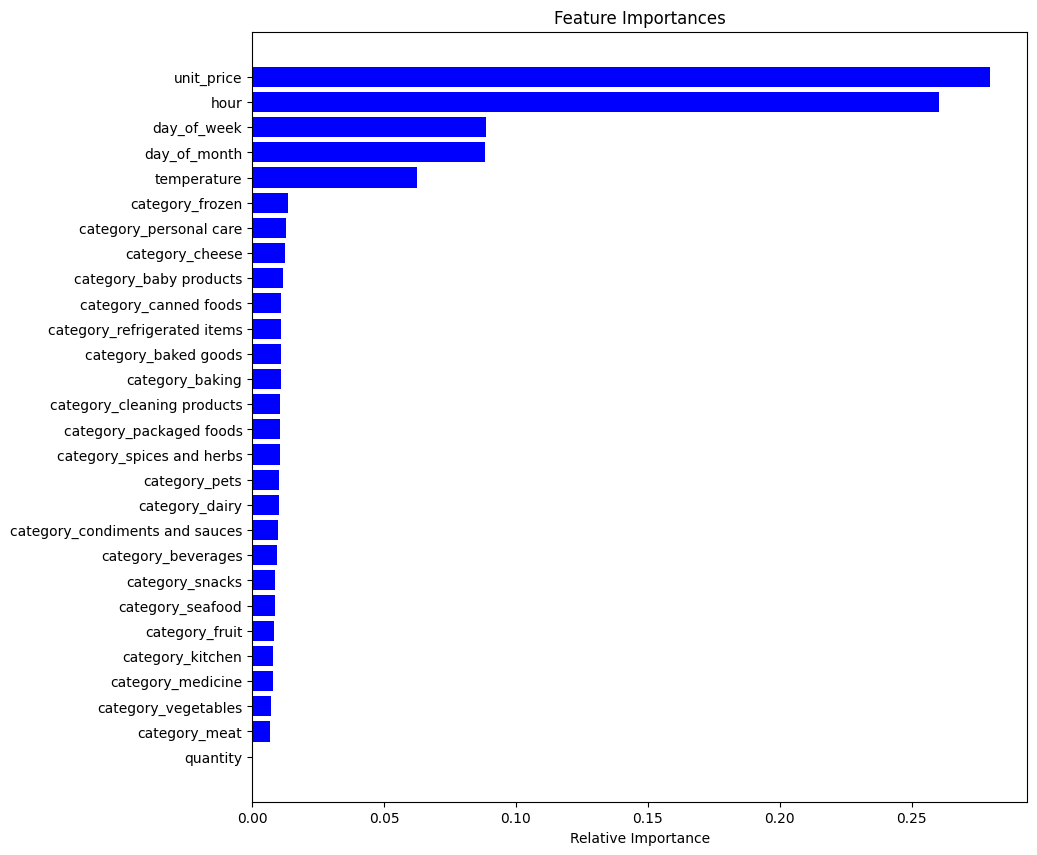

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer # Import SimpleImputer here
import numpy as np
import matplotlib.pyplot as plt

# Assume K and split are defined
K = 5  # Number of folds
split = 0.75  # Train/test split ratio
accuracy = []

kf = KFold(n_splits=K, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Create training and test samples
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Instantiate imputer to handle missing values
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the training data and transform both training and testing data
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Instantiate and scale the data using imputed data
    scaler = StandardScaler().fit(X_train_imputed)  # Use imputed data
    X_train_scaled = scaler.transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # Train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test sample
    y_pred = model.predict(X_test_scaled)  # Use X_test_scaled here for consistency

    # Compute MAE
    mae = mean_absolute_error(y_test, y_pred)
    accuracy.append(mae)
    print(f"Fold {fold + 1}: MAE = {mae:.3f}")

# Print average MAE
average_mae = np.mean(accuracy)
print(f"Average MAE: {average_mae:.2f}")

# Plot feature importances
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

I utilized the scikit-learn library to implement the RandomForestRegressor and handle various aspects of the model, including data preprocessing, cross-validation, and performance evaluation. The steps included handling missing data with SimpleImputer, scaling features with StandardScaler, and evaluating the model using metrics like Mean Absolute Error (MAE).

This is very interesting though. We can see that the `mean absolute error` (MAE) is almost exactly the same each time. This is a good sign, it shows that the performance of the model is consistent across different random samples of the data, which is what we want. In other words, it shows a robust nature.

 Additionally, I analyzed feature importances to understand which factors contributed most significantly to the predictions, further enhancing the model's interpretability.

The `MAE` was chosen as a performance metric because it describes how closely the machine learning model was able to predict the exact value of `estimated_stock_pct`.

Even though the model is predicting robustly, this value for MAE is not so good, since the average value of the target variable is around 0.51, meaning that the accuracy as a percentage was around 50%. In an ideal world, we would want the MAE to be as low as possible. This is where the iterative process of machine learning comes in. At this stage, since we only have small samples of the data, we can report back to the business with these findings and recommend that the the dataset needs to be further engineered, or more datasets need to be added.

As a final note, we can use the trained model to intepret which features were signficant when the model was predicting the target variable. We will use `matplotlib` and `numpy` to visualuse the results, so we should install and import this package.

This feature importance visualisation tells us:

- The product categories were not that important
- The unit price and temperature were important in predicting stock
- The hour of day was also important for predicting stock

With these insights, we can now report this back to the business